# Propagação de feixes de luz

Com os feixes ópticos construídos, podemos estimar computacionalmente sua propagação ao longo de meios ópticos. Novamente aqui faremos primeiramente algumas pré-definições para a execução das células de código.

In [7]:
# retornar sem mensagens (-q = quiet) ao diretório raíz
%cd -q ../../

# importa o módulo beam dessa biblioteca
import optical.beam as beam
# módulo numpy: utilizado na construção e controle de matrizes
import numpy as np
# módulo plotly: utilizado na construção de gráficos
from plotly import graph_objects as go

# construção da região simulada do espaço
x = np.linspace(-40.0, +40.0, 500); # pontos da partição do eixo x
y = np.linspace(-40.0, +40.0, 500); # pontos da partição do eixo y

X, Y = np.meshgrid(x, y);           # malha de pontos do plano X, Y
Z = np.linspace(0.0, 100.0, 1000);  # pontos da partição do eixo z

# definição dos layouts dos gráficos
intensityLayout = go.Layout(
    title = 'Intensidade',
    title_x = 0.5,                  # texto centralizado na horizontal
    xaxis = dict(title = 'x(μm)'),  # legenda do eixo x
    yaxis = dict(title = 'y(μm)'),  # legenda do eixo y
    width = 900,                    # comprimento da imagem
    height = 850                    # altura da imagem
);
phaseLayout = go.Layout(
    title = 'Fase',
    title_x = 0.5,                  # texto centralizado na horizontal
    xaxis = dict(title = 'x(μm)'),  # legenda do eixo x
    yaxis = dict(title = 'y(μm)'),  # legenda do eixo y
    width = 900,                    # comprimento da imagem
    height = 850                    # altura da imagem
);

# criação de um feixe gaussiano
gaussian0 = beam.createG(
    w0 = 10.0,
    region = (X, Y),
    incidence = beam.incidence(1.0, (0.0, 45.0))
);

Para estimar computacionalmente a propagação de feixes ópticos ao longo do meios ópticos (que acarreta na importação de `optical.medium`) utilizamos o módulo `optical.beam.propagation` dessa biblioteca (do qual iremos importar apenas o método a ser utilizado posteriormente).

In [2]:
# importa o módulo medium dessa biblioteca
import optical.medium as medium

## Estimativa da propagação da luz em meios ópticos pelo método de split-step

Para estimar a propagação de feixes em meios ópticos, a forma mais elementar consiste na propagação pelo método `optical.beam.propagation.splitstepPropagate()` que computa a propagação da luz com base em métodos espectrais (via transformada de Fourier).

> `optical.beam.propagation.splitstepPropagate(U, region = (X,Y), Z, medium)`
>
>> Estima, ao longo de `Z` (partição de pontos do eixo das cotas) pelo método de split-step, o feixe `U` propagado através de `medium` (meio óptico) nos pontos de `region` (malha de pontos com as coordenadas da janela computacional).
>
> devemos dar um pouco de atenção à criação de `medium`:
>
>> `medium = optical.medium.create(n0)`
>>
>> meio óptico com índice de refração base de valor `n0`.

In [3]:
# importa o método splitstepPropagate como beampropagate
from optical.beam.propagation import splitstepPropagate as beampropagate

# estimativa da propagação do feixe gaussiano ao longo do meio óptico
gaussian = beampropagate(
    U = gaussian0,
    wavelength = 640.0e-3,
    region = (X, Y),
    Z = Z,
    medium = medium.create(n0 = 1.0),
);

### Perfil transversal de intensidade

#### Perfil inicial

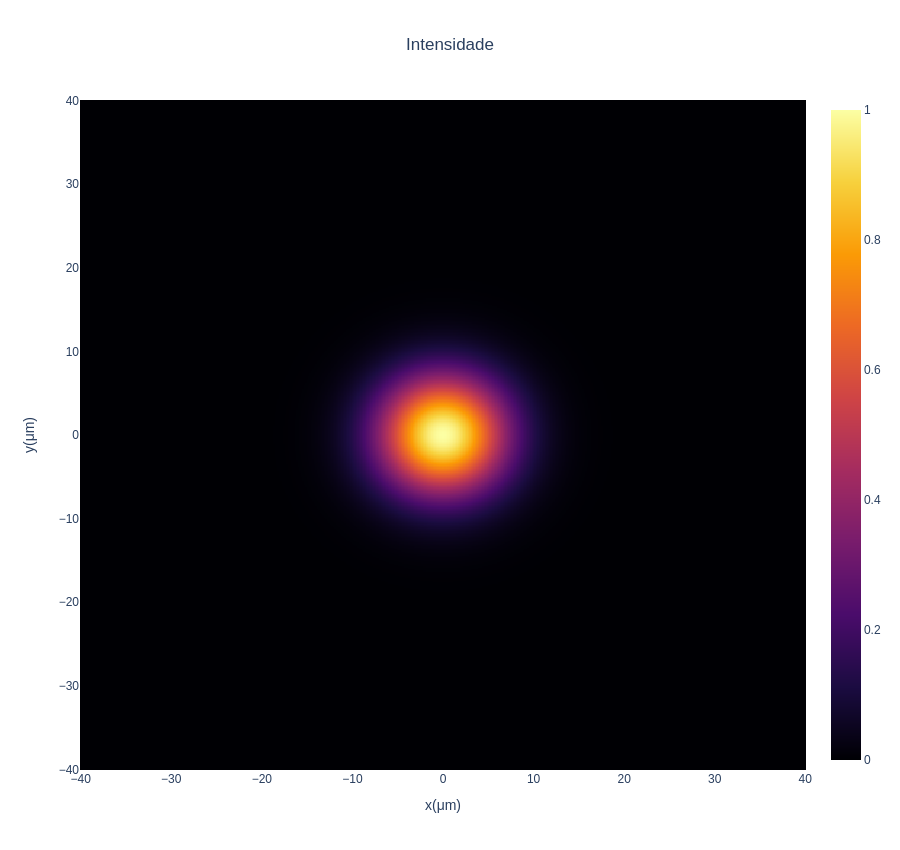

In [6]:
# criação da figura com um gráfico Heatmap da intensidade
intensityGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(gaussian0) ** 2,
        colorscale = 'inferno'
    ),
    layout = intensityLayout
);

intensityGraph.show("png");             # mostrar gráfico de intensidades

#### Perfil propagado

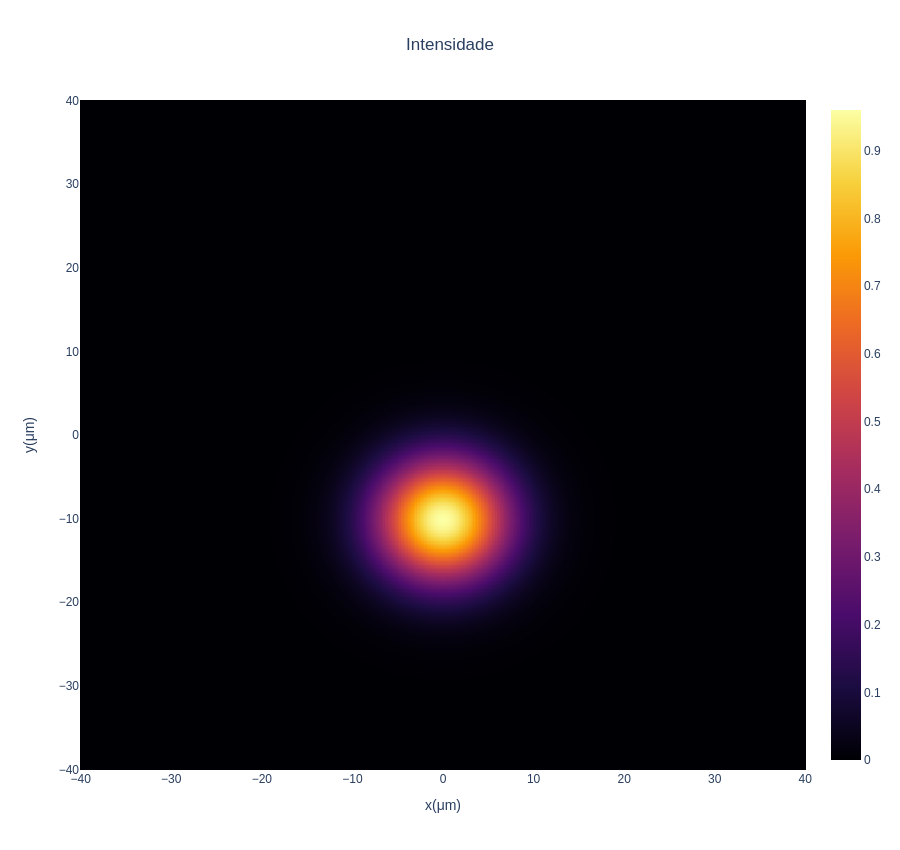

In [4]:
# criação da figura com um gráfico Heatmap da intensidade
intensityGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(gaussian) ** 2,
        colorscale = 'inferno'
    ),
    layout = intensityLayout
);

intensityGraph.show("png");             # mostrar gráfico de intensidades

### Perfil transversal de fase

#### Perfil inicial

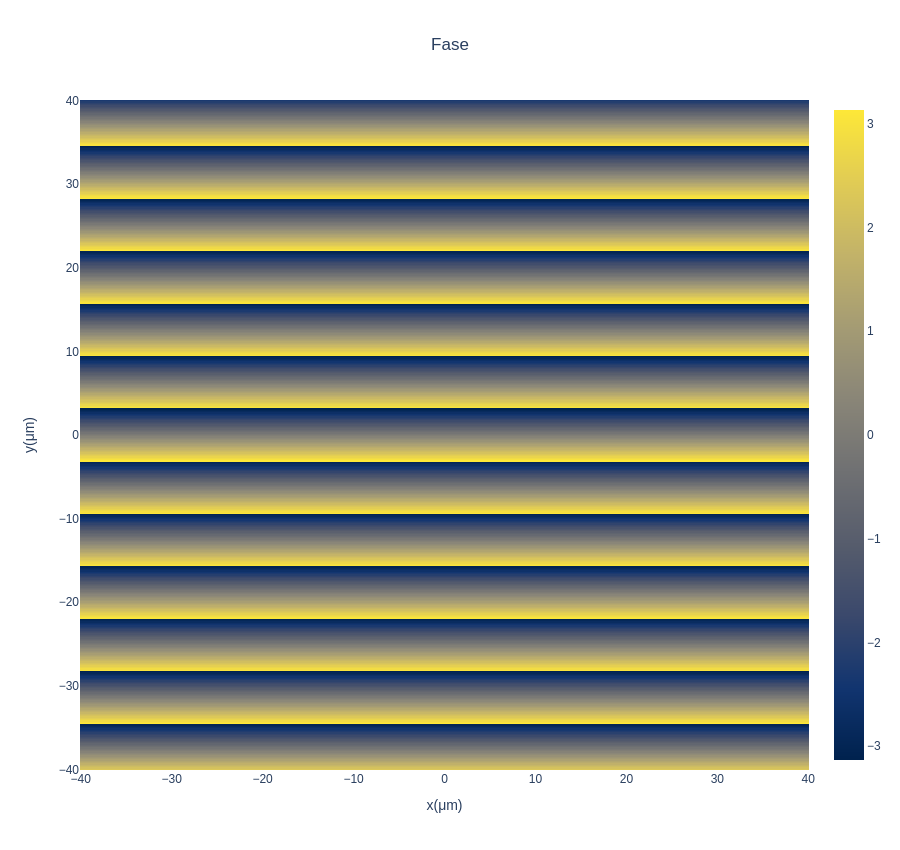

In [8]:
# criação da figura com um gráfico Heatmap da fase
phaseGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(gaussian0),
        colorscale = 'cividis'
    ),
    layout = phaseLayout
);

phaseGraph.show("png");             # mostrar gráfico de fases

#### Perfil propagado

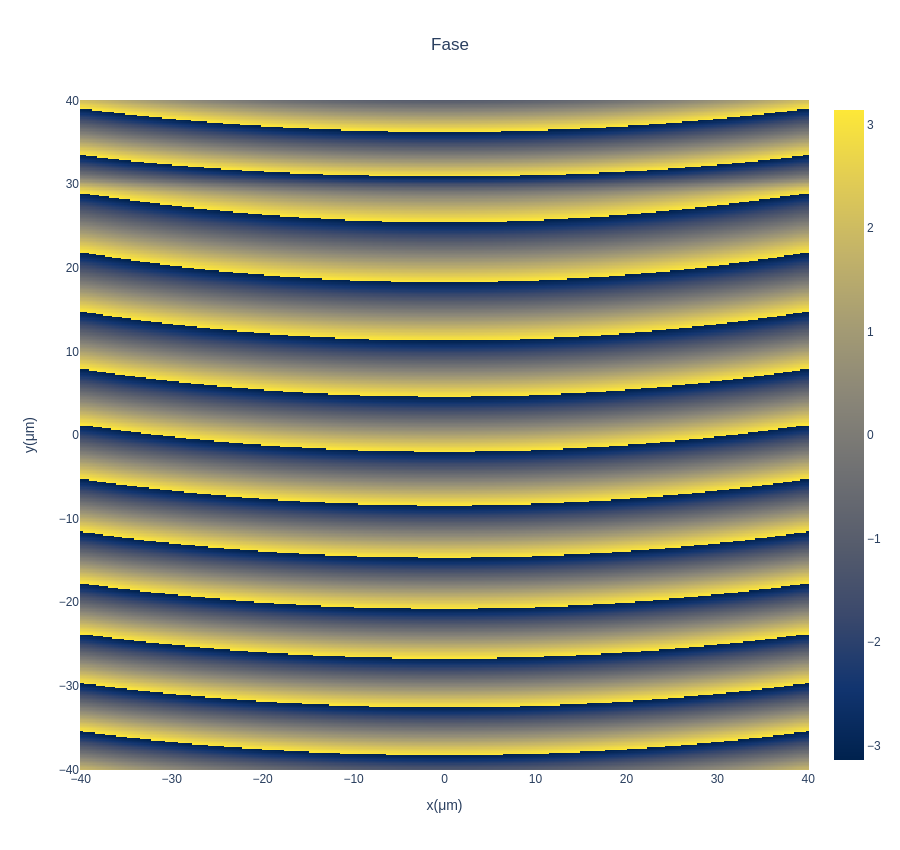

In [5]:
# criação da figura com um gráfico Heatmap da fase
phaseGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(gaussian),
        colorscale = 'cividis'
    ),
    layout = phaseLayout
);

phaseGraph.show("png");             # mostrar gráfico de fases